In [55]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
arquivo = "dados.csv"


try:
    df = pd.read_csv(arquivo, encoding='latin-1', error_bad_lines=False, delimiter=';')
except pd.errors.ParserError as e:
    print(f"Erro na leitura do arquivo CSV: {e}")


if 'df' in locals():
    df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID                              66 non-null     int64 
 1   Nome                            66 non-null     object
 2   Idade                           66 non-null     int64 
 3   Estado                          66 non-null     object
 4   Escolaridade                    66 non-null     object
 5   Tamanho_Propriedade (hectares)  66 non-null     int64 
 6   Producao_Anual (toneladas)      66 non-null     int64 
 7   Faturamento_Anual (BRL)         66 non-null     int64 
 8   Margem_Lucros (%)               66 non-null     object
 9   Cultura                         66 non-null     object
 10  Score_Credito                   66 non-null     int64 
 11  Maquinario                      66 non-null     int64 
 12  Funcionarios                    66 non-null     int6

In [56]:
df.head()

,ID,Nome,Idade,Estado,Escolaridade,Tamanho_Propriedade (hectares),Producao_Anual (toneladas),Faturamento_Anual (BRL),Margem_Lucros (%),Cultura,Score_Credito,Maquinario,Funcionarios,Caixa,Tipo_credito
0,1,João Silva,35,São Paulo,Ensino Médio,100,500,2000000,25%,Milho,750,35,13,542786,Rural
1,2,Maria Santos,42,Minas Gerais,Ensino Superior,200,800,4000000,30%,Café,800,12,9,235641,Custo de Producao
2,3,José Oliveira,28,Bahia,Ensino Médio,150,300,1800000,20%,Soja,600,48,7,156874,Logistica
3,4,Ana Pereira,55,Rio Grande do Sul,Ensino Fundamental,80,200,1000000,15%,Uva,500,7,18,785324,Infraestrutura
4,5,Ricardo Almeida,48,Paraná,Ensino Superior,300,1200,3000000,22%,Trigo,700,22,3,319652,Qualificacao da Mao de Obra


In [59]:
import pandas as pd

# Selecionar os atributos para o modelo
atributos = ['Faturamento_Anual (BRL)', 'Margem_Lucros (%)', 'Score_Credito', 'Caixa', 'Funcionarios']

# Remover o símbolo "%" da coluna "Margem_Lucros (%)"
df['Margem_Lucros (%)'] = df['Margem_Lucros (%)'].str.rstrip('%').astype(float)

# Calcular o Score de Crédito Agro (usando um exemplo simples)
df['Score_Credito_Agro'] = (
    df['Faturamento_Anual (BRL)'] * 0.2 +
    df['Margem_Lucros (%)'] * 0.15 +
    df['Score_Credito'] * 0.3 +
    df['Caixa'] * 0.1 -
    df['Funcionarios'] * 0.05
)

# Exibir o DataFrame com o Score de Crédito Agro calculado
print(df[['ID', 'Nome', 'Score_Credito_Agro']])



    ID              Nome  Score_Credito_Agro
0    1        João Silva           454506.70
1    2      Maria Santos           823808.15
2    3     José Oliveira           375870.05
3    4       Ana Pereira           278683.75
4    5   Ricardo Almeida           632178.35
..  ..               ...                 ...
61  62   Patricia Santos           898715.00
62  63      Andréa Silva           302553.35
63  64    Rafaela Mendes          1546975.55
64  65     Marcos Santos           176371.10
65  66  Carolina Almeida           559686.15

[66 rows x 3 columns]


In [60]:
df.head()

,ID,Nome,Idade,Estado,Escolaridade,Tamanho_Propriedade (hectares),Producao_Anual (toneladas),Faturamento_Anual (BRL),Margem_Lucros (%),Cultura,Score_Credito,Maquinario,Funcionarios,Caixa,Tipo_credito,Score_Credito_Agro
0,1,João Silva,35,São Paulo,Ensino Médio,100,500,2000000,25.0,Milho,750,35,13,542786,Rural,454506.70
1,2,Maria Santos,42,Minas Gerais,Ensino Superior,200,800,4000000,30.0,Café,800,12,9,235641,Custo de Producao,823808.15
2,3,José Oliveira,28,Bahia,Ensino Médio,150,300,1800000,20.0,Soja,600,48,7,156874,Logistica,375870.05
3,4,Ana Pereira,55,Rio Grande do Sul,Ensino Fundamental,80,200,1000000,15.0,Uva,500,7,18,785324,Infraestrutura,278683.75
4,5,Ricardo Almeida,48,Paraná,Ensino Superior,300,1200,3000000,22.0,Trigo,700,22,3,319652,Qualificacao da Mao de Obra,632178.35


In [61]:
# Ordenar o DataFrame por uma coluna
df = df.sort_values(by='Score_Credito_Agro')

df.head()

,ID,Nome,Idade,Estado,Escolaridade,Tamanho_Propriedade (hectares),Producao_Anual (toneladas),Faturamento_Anual (BRL),Margem_Lucros (%),Cultura,Score_Credito,Maquinario,Funcionarios,Caixa,Tipo_credito,Score_Credito_Agro
21,22,Paula Costa,29,Rondônia,Ensino Superior,160,287,287156,30.0,Algodão,812,45,7,821495,Custo de Producao,139828.45
64,65,Marcos Santos,32,Mato Grosso,Ensino Superior,390,697,697854,29.0,Milho,697,26,5,365871,Rural,176371.10
50,51,Eduardo Lima,57,Maranhão,Ensino Médio,80,58,587412,24.0,Soja,762,6,12,587412,Rural,176455.20
34,35,Bruno Rocha,59,Rio de Janeiro,Ensino Superior,310,69,698742,34.0,Soja,856,6,12,587412,Qualificacao da Mao de Obra,198750.90
13,14,Lúcia Silva,47,Minas Gerais,Ensino Fundamental,70,180,720000,16.0,Café,540,17,15,617235,Ambiental,205887.15


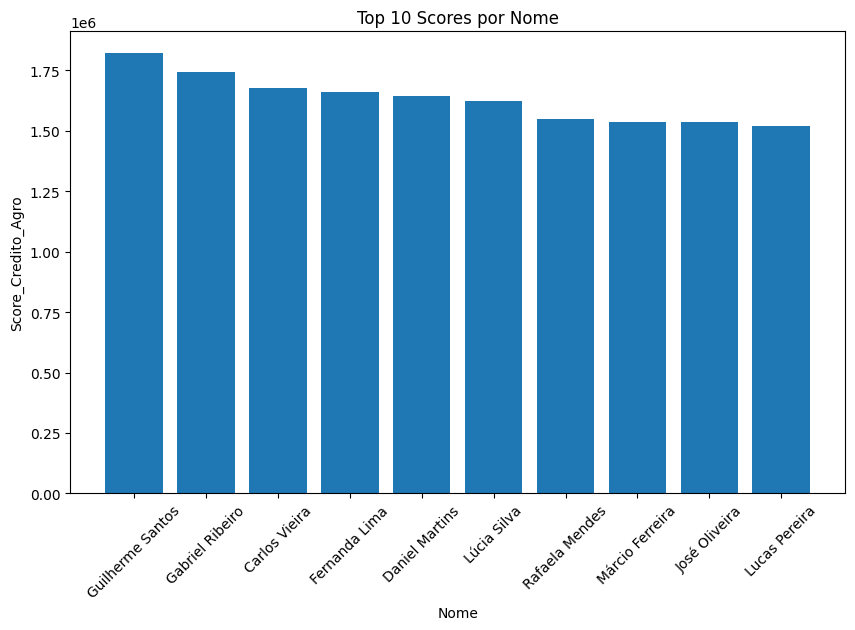

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Ordenar o DataFrame por Score em ordem decrescente
df_ordenado = df.sort_values(by='Score_Credito_Agro', ascending=False)

# Selecionar os 10 primeiros registros
top_10 = df_ordenado.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_10['Nome'], top_10['Score_Credito_Agro'])
plt.xlabel('Nome')
plt.ylabel('Score_Credito_Agro')
plt.title('Top 10 Scores por Nome')
plt.xticks(rotation=45)  # Rotacionar os nomes no eixo x para melhor legibilidade
plt.show()


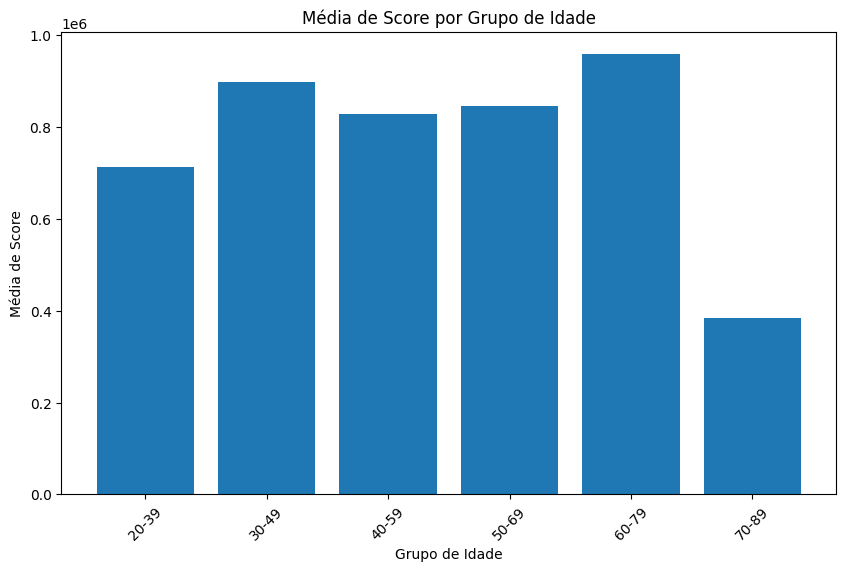

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Definir os intervalos de idades
intervalos = [20, 30, 40, 50, 60, 70, 80]

# Criar rótulos para os intervalos
rotulos = [f'{i}-{i+19}' for i in intervalos[:-1]]  # Remove o último intervalo

# Criar uma coluna 'Grupo_Idade' com base nos intervalos
df['Grupo_Idade'] = pd.cut(df['Idade'], bins=intervalos, labels=rotulos, right=False)

# Calcular a média de score por grupo de idade
media_scores = df.groupby('Grupo_Idade')['Score_Credito_Agro'].mean().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(media_scores['Grupo_Idade'], media_scores['Score_Credito_Agro'])
plt.xlabel('Grupo de Idade')
plt.ylabel('Média de Score')
plt.title('Média de Score por Grupo de Idade')
plt.xticks(rotation=45)
plt.show()



O código fornecido realiza o cálculo do "Score_Credito_Agro" com base em uma combinação linear dos atributos fornecidos. O código seleciona os atributos relevantes que serão usados para calcular o "Score_Credito_Agro". Esses atributos são: faturamento anual, margem de lucros, score de crédito, caixa e número de funcionários.

Cada atributo é multiplicado por um peso específico e, em seguida, esses valores ponderados são somados para obter o score final.

O faturamento anual contribui com 20% para o score.
A margem de lucros contribui com 15%.
O score de crédito contribui com 30%.
O caixa contribui com 10%.
O número de funcionários é subtraído com um peso de -5%.
Esses pesos são valores fictícios e podem ser ajustados conforme necessário, dependendo da lógica de cálculo real do score de crédito agro. A ideia geral é que atributos positivos (como faturamento, margem e score) aumentem o score, enquanto atributos negativos o diminuam.

In [64]:
import pandas as pd

df = pd.DataFrame(df)

# Calcule alguns dados estatísticos
media_idade = df['Idade'].mean()
media_faturamento = df['Faturamento_Anual (BRL)'].mean()
maior_score = df['Score_Credito'].max()
menor_score = df['Score_Credito'].min()

# Exiba os resultados
print(f'Média de Idade: {media_idade}')
print(f'Média de Faturamento Anual: {media_faturamento}')
print(f'Maior Score de Crédito: {maior_score}')
print(f'Menor Score de Crédito: {menor_score}')


Média de Idade: 45.25757575757576
Média de Faturamento Anual: 3972129.5454545454
Maior Score de Crédito: 946
Menor Score de Crédito: 500


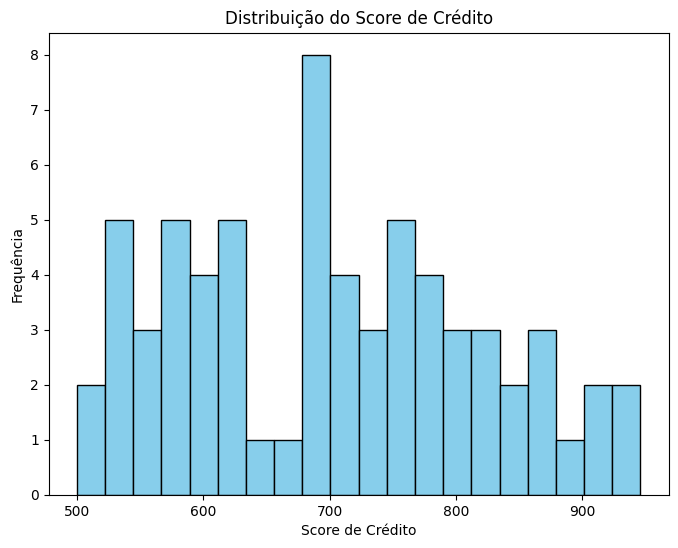

In [65]:
import pandas as pd

df = pd.DataFrame(df)

# 1. Resumo Estatístico Geral
resumo_geral = df.describe()

# 2. Correlação entre Variáveis
correlacao = df.corr()

# 3. Histogramas e Gráficos de Boxplot
import matplotlib.pyplot as plt

#Histograma do Score de Crédito
plt.figure(figsize=(8, 6))
plt.hist(df['Score_Credito'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score de Crédito')
plt.ylabel('Frequência')
plt.title('Distribuição do Score de Crédito')
plt.show()


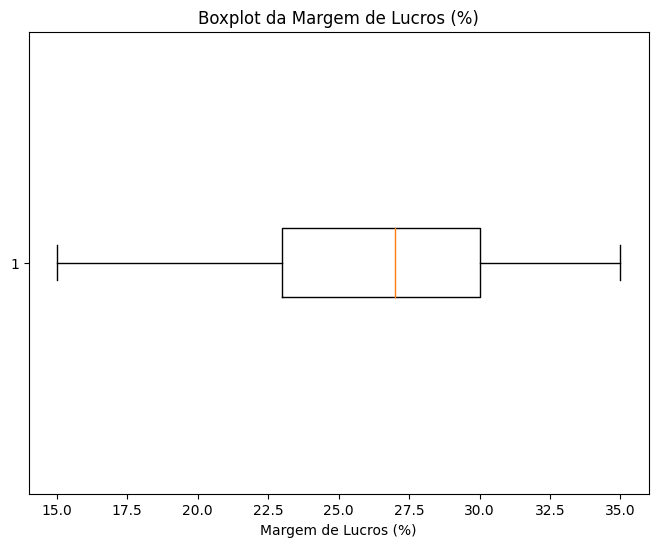

In [66]:
#Gráfico de Boxplot da Margem de Lucros (%)
plt.figure(figsize=(8, 6))
plt.boxplot(df['Margem_Lucros (%)'], vert=False)
plt.xlabel('Margem de Lucros (%)')
plt.title('Boxplot da Margem de Lucros (%)')
plt.show()

In [67]:
import pandas as pd

# Criar a matriz de correlação entre "Faturamento_Anual (BRL)" e "Caixa"
matriz_correlacao = df[['Faturamento_Anual (BRL)', 'Caixa']].corr()

# Exibir a matriz de correlação
print(matriz_correlacao)


                         Faturamento_Anual (BRL)     Caixa
Faturamento_Anual (BRL)                 1.000000 -0.313149
Caixa                                  -0.313149  1.000000


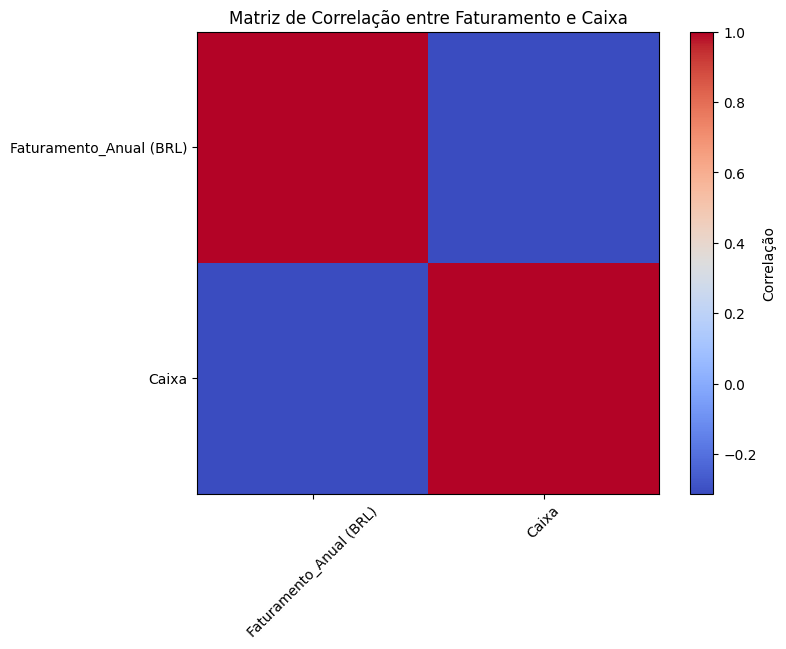

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar a matriz de correlação entre "Faturamento_Anual (BRL)" e "Caixa"
matriz_correlacao = df[['Faturamento_Anual (BRL)', 'Caixa']].corr()

# Criar o gráfico de matriz de correlação
plt.figure(figsize=(8, 6))
plt.imshow(matriz_correlacao, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlação')
plt.xticks(range(len(matriz_correlacao.columns)), matriz_correlacao.columns, rotation=45)
plt.yticks(range(len(matriz_correlacao.columns)), matriz_correlacao.columns)
plt.title('Matriz de Correlação entre Faturamento e Caixa')
plt.show()


In [69]:
import pandas as pd

id_desejado = 2
dados_do_id = df[df['ID'] == id_desejado]

In [70]:
media_faturamento_id = dados_do_id['Faturamento_Anual (BRL)']
print(f'Média do Faturamento Anual para o ID {id_desejado}: {media_faturamento_id}')


Média do Faturamento Anual para o ID 2: 1    4000000
Name: Faturamento_Anual (BRL), dtype: int64


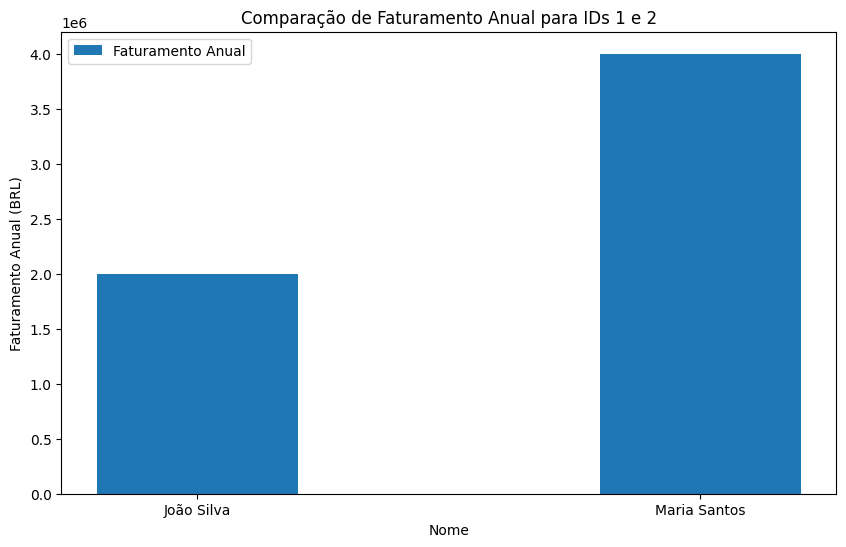

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecione os IDs que deseja comparar (por exemplo, IDs 1 e 2)
ids_desejados = [1, 2]
dados_dos_ids = df[df['ID'].isin(ids_desejados)]

# Realize análises específicas com base nos dados dos IDs selecionados
# Por exemplo, você pode criar um gráfico de barras para comparar o faturamento anual dos dois IDs com os nomes correspondentes:
nomes_dos_ids = dados_dos_ids['Nome'].tolist()
faturamento_anual = dados_dos_ids['Faturamento_Anual (BRL)'].tolist()

plt.figure(figsize=(10, 6))
plt.bar(nomes_dos_ids, faturamento_anual, width=0.4, label='Faturamento Anual')
plt.xlabel('Nome')
plt.ylabel('Faturamento Anual (BRL)')
plt.title('Comparação de Faturamento Anual para IDs 1 e 2')
plt.legend()
plt.show()

# Você pode realizar outras análises e visualizações com base nos dados dos IDs selecionados.



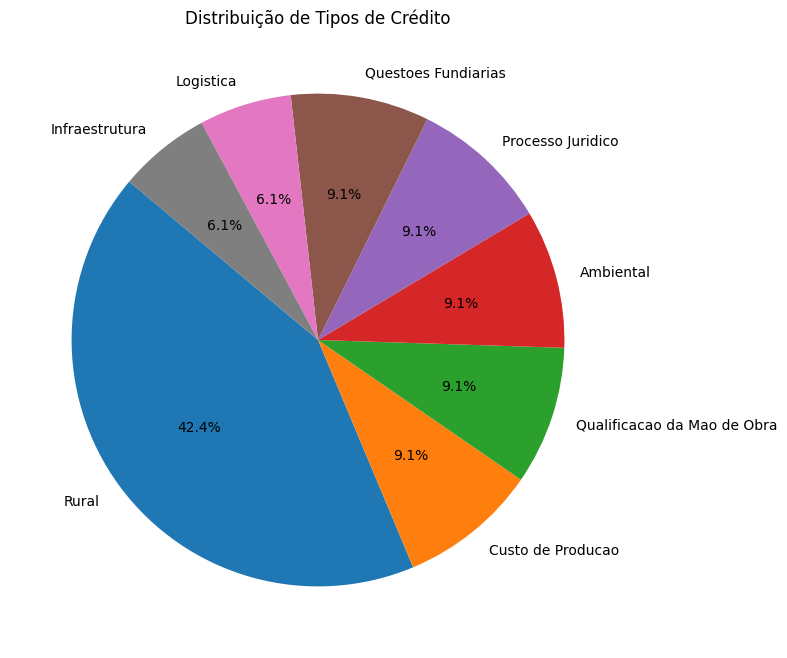

In [86]:
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Contar o número de ocorrências de cada tipo de crédito
contagem_tipos_credito = df['Tipo_credito '].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_tipos_credito, labels=contagem_tipos_credito.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Tipos de Crédito')
plt.show()
